# KPMG AU VIRTUAL INTERNSHIP - TASK 1

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## Customer Demography Review

In [78]:
df1 = pd.read_csv('csv1/Customerdemographic.csv', delimiter=';', low_memory=False)

In [79]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,23/10/1931,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,22/08/1935,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,22/09/1940,NaN,Property,Mass Customer,N,á,No,16.0
3,2413,Abbey,Murrow,Male,27,11/08/1943,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
4,658,Donn,Bonnell,Male,38,24/01/1944,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0


In [80]:
df1.shape

(4000, 13)

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [82]:
df1.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

### Check Missing Values

In [83]:
df1.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [84]:
round(df1.isnull().sum()/df1.shape[0]*100, 2)

customer_id                             0.00
first_name                              0.00
last_name                               3.12
gender                                  0.00
past_3_years_bike_related_purchases     0.00
DOB                                     2.17
job_title                              12.65
job_industry_category                  16.40
wealth_segment                          0.00
deceased_indicator                      0.00
default                                 7.55
owns_car                                0.00
tenure                                  2.17
dtype: float64

In [85]:
df1.duplicated().any()

False

In [86]:
df1[df1.duplicated()==True]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [87]:
df1[df1.duplicated()==False].shape[0]

4000

## Check Outlier

In [88]:
df1.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [89]:
df1.describe(include='object')

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3913,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,3448,195,9,3,2,101,2
top,Tobe,Ramsdell,Female,30/01/1978,Business Systems Development Analyst,Manufacturing,Mass Customer,N,"1,00E+02",Yes
freq,5,3,2037,7,45,799,2000,3998,111,2024


<AxesSubplot:xlabel='past_3_years_bike_related_purchases', ylabel='Density'>

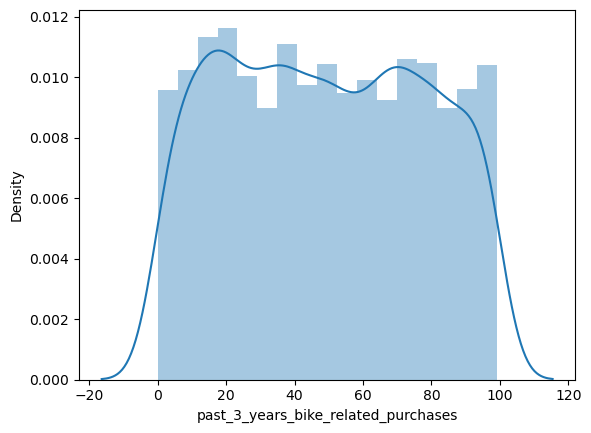

In [90]:
sns.distplot(df1['past_3_years_bike_related_purchases'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

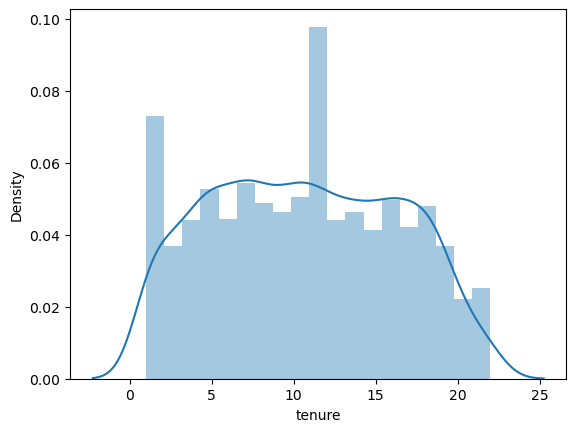

In [91]:
sns.distplot(df1['tenure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a60765a190>,
 'caps': [<matplotlib.lines.Line2D at 0x2a60765a730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a607648e80>],
 'medians': [<matplotlib.lines.Line2D at 0x2a60765acd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a60765afa0>],
 'means': []}

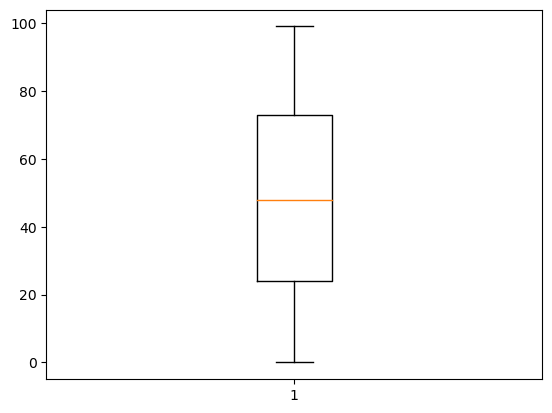

In [92]:
plt.boxplot(df1['past_3_years_bike_related_purchases'])

## EDA Customer Demographic

In [93]:
df1.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

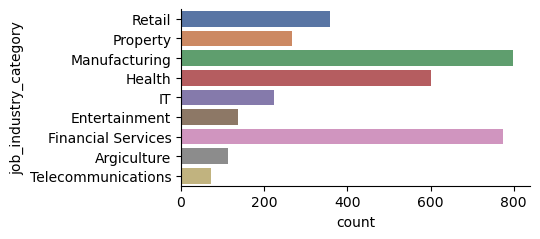

In [94]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='job_industry_category', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

<Figure size 1000x500 with 0 Axes>

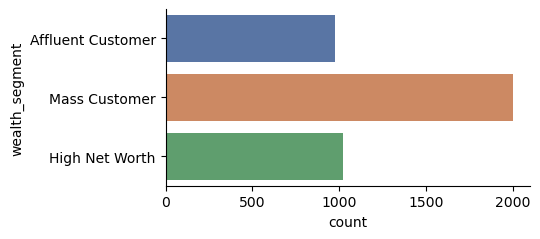

In [95]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='wealth_segment', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

<Figure size 1000x500 with 0 Axes>

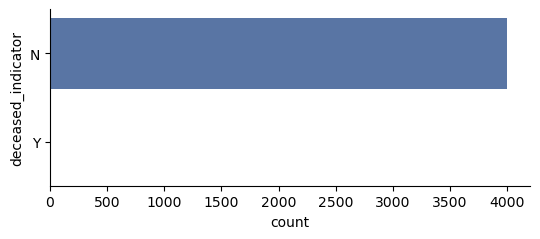

In [96]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='deceased_indicator', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

<Figure size 1000x500 with 0 Axes>

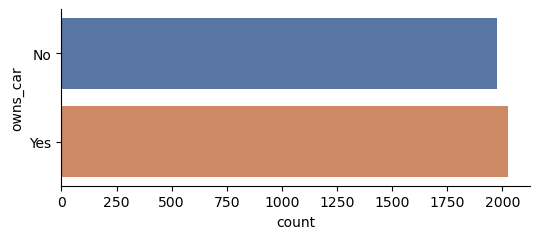

In [97]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='owns_car', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

<Figure size 1000x500 with 0 Axes>

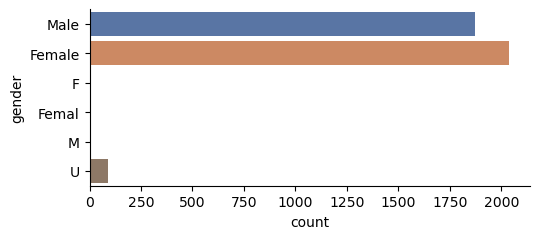

In [98]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='gender', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

In [99]:
df1.value_counts('job_title')

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Administrative Assistant II              4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Length: 195, dtype: int64

In [100]:
df1.value_counts('default')

default
1,00E+02                                                                                                                                 111
-1,00E+02                                                                                                                                 96
1                                                                                                                                         70
-1                                                                                                                                        64
Ù¡Ù¢Ù£                                                                                                                                    53
                                                                                                                                        ... 
$1.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000,00      2
-5,00

# Customer Adresses Review

In [101]:
df2 = pd.read_csv('csv1/CustomerAddres.csv', delimiter=';', low_memory=False)

In [102]:
df2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [103]:
df2.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [105]:
df2.shape

(3999, 6)

In [106]:
df2.duplicated().any()

False

In [107]:
df2.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [108]:
round(df2.isnull().sum()/df1.shape[0]*100, 2)

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

## EDA Customer Address

In [109]:
df2.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [110]:
df2.describe(include='object')

,address,state,country
count,3999,3999,3999
unique,3996,5,1
top,3 Mariners Cove Terrace,NSW,Australia
freq,2,2054,3999


In [111]:
df2['address'].value_counts()

3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64

In [112]:
df2['country'].value_counts()

Australia    3999
Name: country, dtype: int64

<Figure size 1000x500 with 0 Axes>

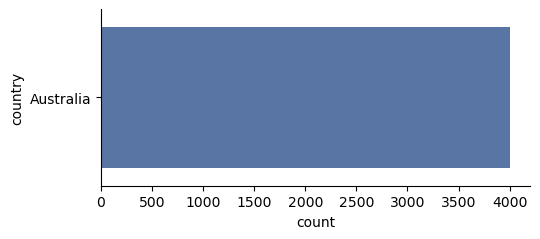

In [113]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='country', kind='count', data=df2, height=2.5, aspect=2.2, palette = 'deep')

In [114]:
df2['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

<Figure size 1000x500 with 0 Axes>

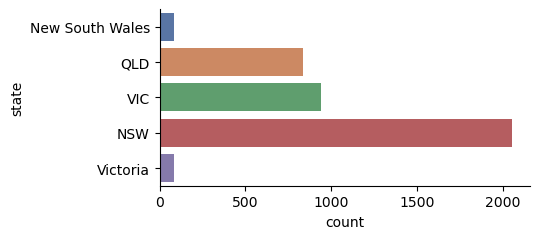

In [115]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='state', kind='count', data=df2, height=2.5, aspect=2.2, palette = 'deep')

<AxesSubplot:xlabel='property_valuation', ylabel='Density'>

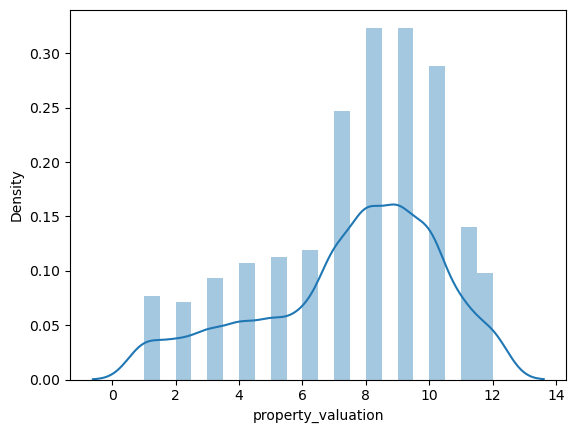

In [116]:
sns.distplot(df2['property_valuation'])

<AxesSubplot:xlabel='property_valuation'>

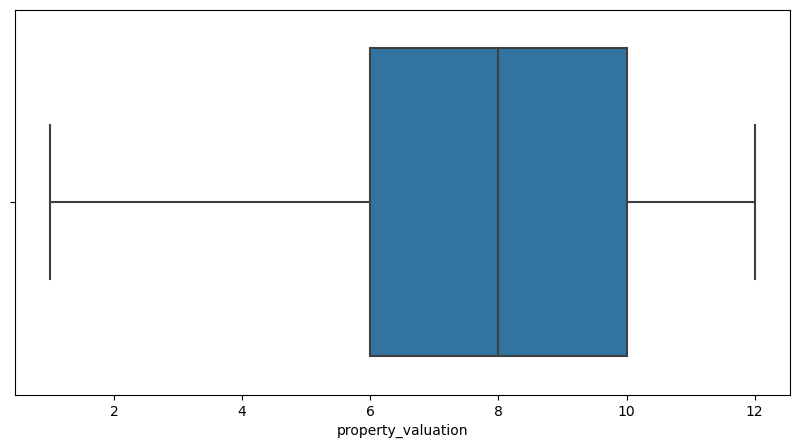

In [117]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='property_valuation', data=df2)

<AxesSubplot:xlabel='postcode', ylabel='Density'>

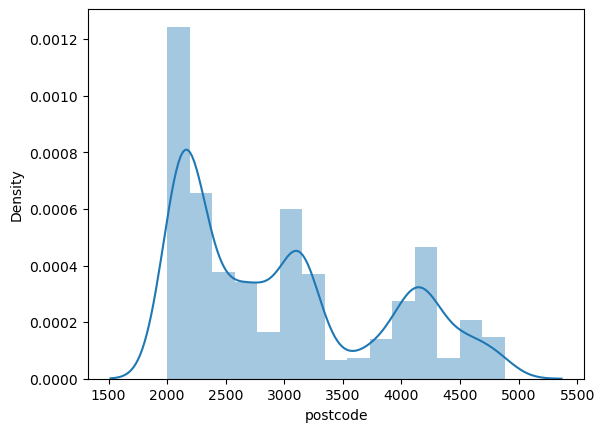

In [118]:
sns.distplot(df2['postcode'])

<AxesSubplot:xlabel='postcode'>

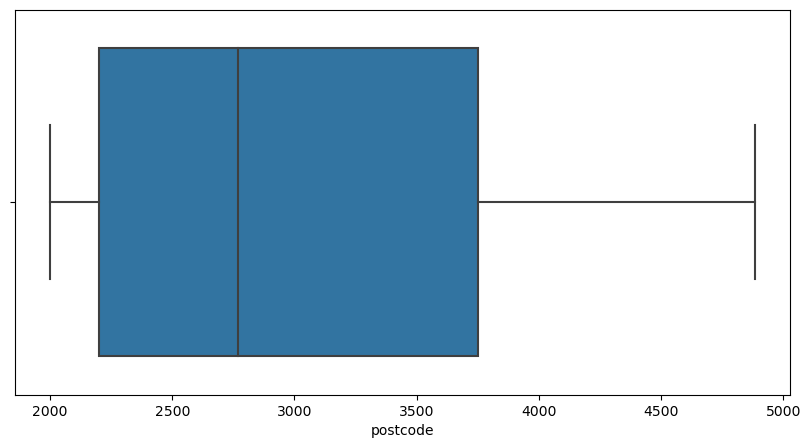

In [119]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='postcode', data=df2)

In [120]:
df2['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

# Transcation Review

In [121]:
df3 = pd.read_csv('csv1/Transactions.csv', delimiter=';', low_memory=False)

In [122]:
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


In [123]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


In [124]:
df3.shape

(20000, 13)

In [125]:
df3.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [126]:
round(df3.isnull().sum()/df3.shape[0]*100, 2)

transaction_id             0.00
product_id                 0.00
customer_id                0.00
transaction_date           0.00
online_order               1.80
order_status               0.00
brand                      0.98
product_line               0.98
product_class              0.98
product_size               0.98
list_price                 0.00
standard_cost              0.98
product_first_sold_date    0.98
dtype: float64

In [127]:
df3.duplicated().any()

False

## EDA Transactions

In [128]:
df3.describe()

,transaction_id,product_id,customer_id,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,38199.776549
std,5773.647028,30.75359,1011.951046,2875.201110
min,1.000000,0.00000,1.000000,33259.000000
25%,5000.750000,18.00000,857.750000,35667.000000
50%,10000.500000,44.00000,1736.000000,38216.000000
75%,15000.250000,72.00000,2613.000000,40672.000000
max,20000.000000,100.00000,5034.000000,42710.000000


In [129]:
df3.describe(include='object')

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
count,20000,19640,20000,19803,19803,19803,19803,20000,19803
unique,364,2,2,6,4,3,3,296,103
top,14/02/2017,True,Approved,Solex,Standard,medium,medium,"2091,47","$388,92"
freq,82,9829,19821,4253,14176,13826,12990,465,465


<AxesSubplot:xlabel='product_first_sold_date', ylabel='Density'>

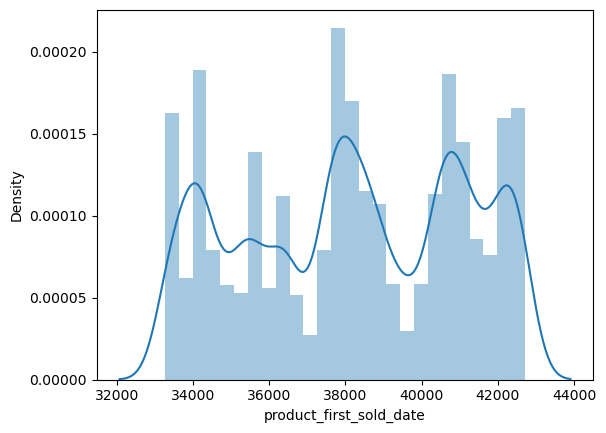

In [130]:
sns.distplot(df3['product_first_sold_date'])

<AxesSubplot:xlabel='product_first_sold_date'>

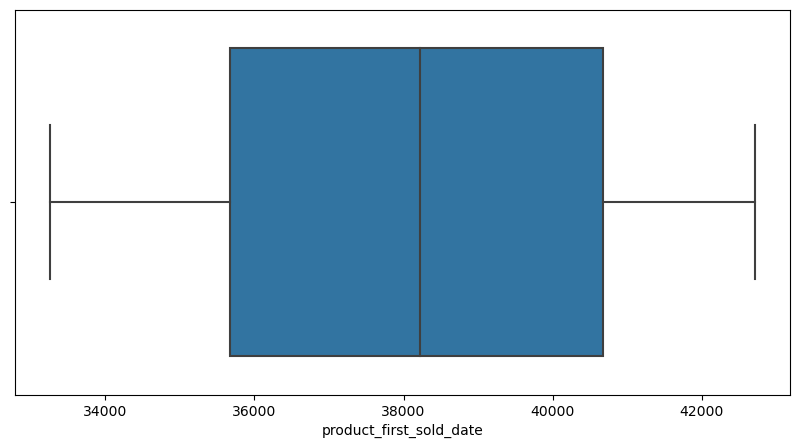

In [131]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='product_first_sold_date', data=df3)

In [132]:
df3.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [133]:
df3['transaction_date'].value_counts()

14/02/2017    82
18/08/2017    82
15/10/2017    76
31/01/2017    73
19/12/2017    71
              ..
12/01/2017    38
07/12/2017    37
29/03/2017    36
25/09/2017    35
19/10/2017    32
Name: transaction_date, Length: 364, dtype: int64

In [134]:
df3['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

<Figure size 1000x500 with 0 Axes>

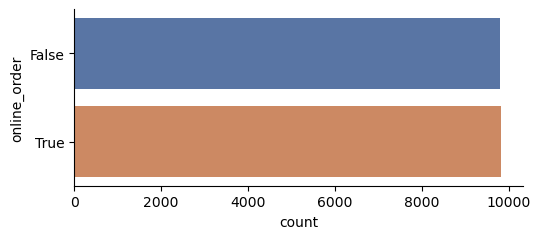

In [135]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='online_order', kind='count', data=df3, height=2.5, aspect=2.2, palette = 'deep')

In [136]:
df3['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

<Figure size 1000x500 with 0 Axes>

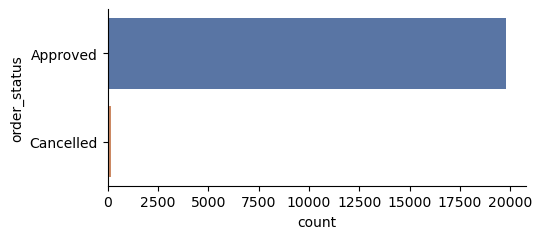

In [137]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='order_status', kind='count', data=df3, height=2.5, aspect=2.2, palette = 'deep')

In [138]:
df3['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

<Figure size 1000x500 with 0 Axes>

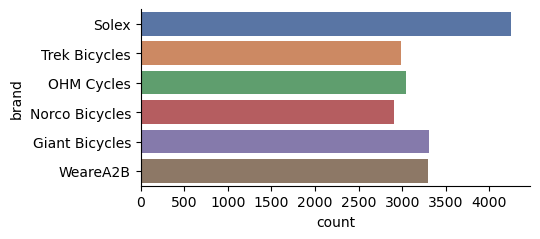

In [139]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='brand', kind='count', data=df3, height=2.5, aspect=2.2, palette = 'deep')

In [140]:
df3['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

<Figure size 1000x500 with 0 Axes>

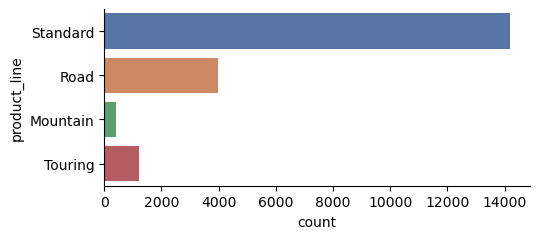

In [141]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='product_line', kind='count', data=df3, height=2.5, aspect=2.2, palette = 'deep')

In [142]:
df3['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

<Figure size 1000x500 with 0 Axes>

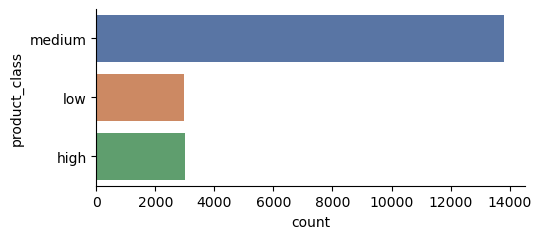

In [143]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='product_class', kind='count', data=df3, height=2.5, aspect=2.2, palette = 'deep')

In [144]:
df3['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

<Figure size 1000x500 with 0 Axes>

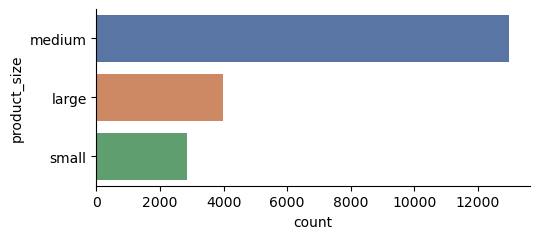

In [145]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='product_size', kind='count', data=df3, height=2.5, aspect=2.2, palette = 'deep')

In [146]:
df3['list_price'].value_counts()

2091,47    465
1403,5     396
71,49      274
1231,15    235
1890,39    233
          ... 
56,21        1
126,36       1
1300,96      1
1697,27      1
867,92       1
Name: list_price, Length: 296, dtype: int64

In [147]:
df3['standard_cost'].value_counts()

$388,92        465
$954,82        396
$53,62         274
$161,60        235
$260,14        233
              ... 
$151,96        124
$206,35        114
312,7350159      1
270,2999878      1
667,4000244      1
Name: standard_cost, Length: 103, dtype: int64

- untuk modelling unique(desr) values tidak lebih dari 15, jika lebih maka tidak layak untuk masuk ke modelling
- perhatikan data-data yang redundant
- perhatikan korelasi
- untuk distribusi perhatikan mean dan mediannya, jika jarak median dan mean tidak terlalu jauh maka is okay

In [148]:
dfc = pd.read_csv('csv/loan_customer.csv')

In [149]:
dfc.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [150]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [151]:
dfc.duplicated().sum()

1

In [152]:
dfc.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.690000e+02,612.000000,621.000000,621.000000,621.000000,621.000000,570.000000
mean,5.468552e+11,5681.549020,1616.874267,145133.655395,342.608696,28.550725,0.842105
std,1.987860e+11,9056.454103,2915.075138,84011.115879,64.090837,5.340903,0.364963
min,6.281101e+10,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,6.281140e+11,2874.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281343e+11,3812.500000,1167.000000,125000.000000,360.000000,30.000000,1.000000
75%,6.285665e+11,5815.750000,2302.000000,165000.000000,360.000000,30.000000,1.000000
max,6.287799e+11,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000
